In [1]:
#import cdsapi
import pandas as pd
#import netcdf4
import xarray as xarr # pandas based library for 
            # labeled data with N-D tensors at each dimensions
import matplotlib.pyplot as plt
%matplotlib inline 
import cartopy
import cartopy.crs as ccrs
import numpy as np
import geopandas
import salem
import pandas_profiling
import seaborn as sns

In [2]:
# Read the data Path where it is stored on the Computer
#data_dir = input('Path to the data\n')
data_dir = "C:\\Users\\kurt_\\Data\\crop_climotology\\"

In [3]:
# Import data as xarray dataset from the directory
dask = True
if dask:
    # Import with dask
    clim = xarr.open_mfdataset(data_dir+'*.nc', parallel=True, 
                              combine='by_coords', chunks={'time': 50}
                             , engine='netcdf4')
    print(f'The chunk size for time dimension is {clim.chunks["time"][0]}\n')
    print(f'dataset, thus, have {len(clim.time)/clim.chunks["time"][0]} chunks')
else:
    # Import without dask for debugging
    clim = xarr.open_mfdataset(data_dir+'*.nc', parallel=False, 
                          combine='by_coords', engine='netcdf4')

The chunk size for time dimension is 50

dataset, thus, have 21.6 chunks


In [4]:
#print(clim.data_vars)
#print(clim.coords)
clim

&lt;xarray.Dataset&gt;
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 1080)
Coordinates:
  * time         (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] dask.array&lt;chunksize=(50, 2), meta=np.ndarray&gt;
    BEDD         (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    DTR          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    FD           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    ID           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    R10mm        (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    R20mm        (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    RR           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    RR1          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    SDII         (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    SU           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TG           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TN           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TNn          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TNx          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TR           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TX           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TXn          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TXx          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
Attributes:
    title:          BEDD index from ECA heat indices
    institution:    Copernicus Climate Change Service
    comment:        
    history:         \n2019-04-26 13:25:29 Calculation of BEDD indice (dekada...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-26T13:25:29GMT
    lineage:        
    keywords:       
    license:        
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    source:         The WFDEI meteorological forcing data set: WATCH Forcing ...

In [6]:
# The shape of a variable
mnt_sub.TG

&lt;xarray.DataArray &#39;TG&#39; (time: 1080, lat: 360, lon: 720)&gt;
dask.array&lt;open_dataset-d517adfe38fafbbc7b4d8db68bb90d52TG, shape=(1080, 360, 720), dtype=float32, chunksize=(50, 360, 720), chunktype=numpy.ndarray&gt;
Coordinates:
  * time     (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:         K
    long_name:     Mean of daily mean temperature
    cell_methods:  time: mean

In [5]:
for var in clim:
    print(f'Variables in the data: {clim[var].attrs}')
# Let's select the first time step and plot the 2m-air temperature

# Let's check the dimensions
for dim in clim.dims:
    dimsize = clim.dims[dim]
    print(f'\nData has {dimsize} {dim} ')
    if dim == 'latitude':
        print(f' latitudes: from {float(clim[dim].min())} degree South',
     f'to {float(clim[dim].max())} degree North')
    if dim == 'longitude':
        print(f' Longitudes: from {float(clim[dim].max())} degree East',
     f'to {float(clim[dim].min())} degree West')
    if dim == 'time':
        print(f'time: from {pd.to_datetime(clim["time"].min().values)} to {pd.to_datetime(clim["time"].max().values)} ')

Variables in the data: {}
Variables in the data: {&#39;units&#39;: &#39;degrees_C&#39;, &#39;long_name&#39;: &#39;Biologically Effective Degree Days&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;&#39;, &#39;long_name&#39;: &#39;Mean of diurnal temperature range&#39;, &#39;cell_methods&#39;: &#39;time: mean&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Frost days (minimum temperature &lt; 0 degrees_C)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Ice days (maximum temperature &lt; 0 degrees_C)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Heavy precipitation days (precipitation &gt;= 10 mm)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Ver

# Preparing The Crop Production Data
Crop Data is obtained from:


### Alfalfa Hay
Alfalfa hay is produced mostly in North-Western States. Among them it is produced throughout all Montana and in most of the Idaho which makes them more convenient for agroclimatic analysis.

Here is the map that shows where Alfala hay is produced
Source: https://www.nass.usda.gov/Charts_and_Maps/Crops_County/al-ha.php

* Masking climate data only to keep the relavant states using **Salem**
* Geospatial data for the state boundaries are from US Census
* Let's examine the shape file for US States using __Geopandas__


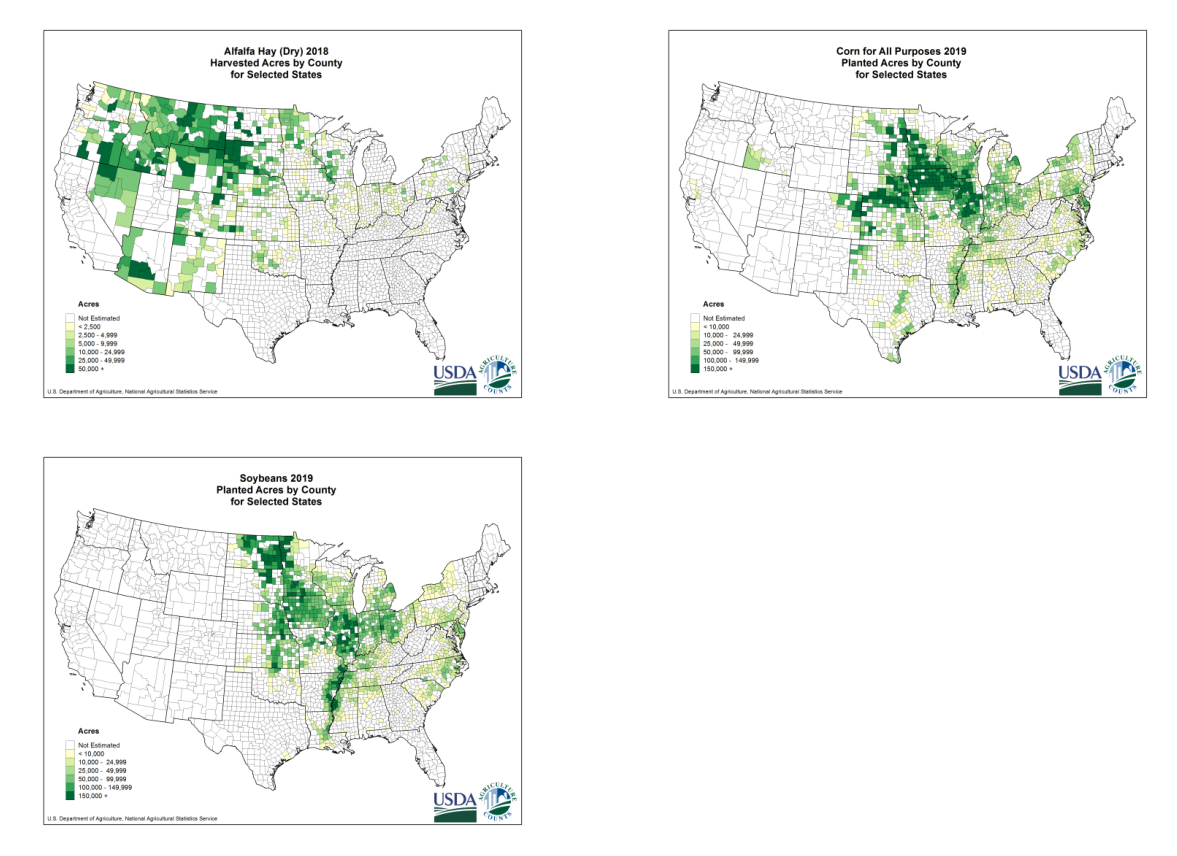

In [6]:

from matplotlib.gridspec import GridSpec
import matplotlib as mpl

mpl.rc('figure', figsize = (18,12))
fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

a = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/AL-HA-RGBChor.png")
ax1.imshow(a)
c = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/CR-PL-RGBChor.png")
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(c)
s = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/SB-PL-RGBChor.png")
ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(s)
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
plt.tight_layout()
plt.show()
plt.close()

mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
# Let's read the geospatial data for the states
path = 'C:\\Users\\kurt_\\Data\\usstates\\'
geo_usa = geopandas.read_file(path)
print(type(geo_usa))
print('The coordinate Reference System Info:')
print(geo_usa.crs)
geo_usa.head()

&lt;class &#39;geopandas.geodataframe.GeoDataFrame&#39;&gt;
The coordinate Reference System Info:
{&#39;init&#39;: &#39;epsg:4269&#39;}


STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

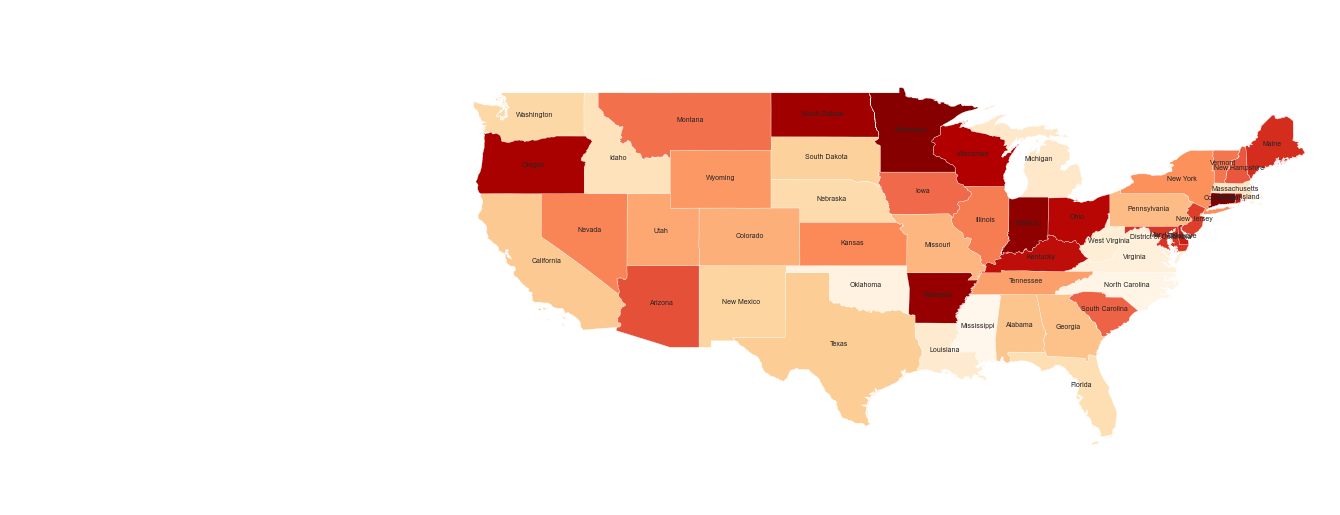

In [5]:
# Let's see the state boundaries on a map to see
# if there is an error

# Getting rid of oversees territories from the map
geo_usa = geo_usa[geo_usa.STATEFP.apply(lambda x: int(x)) < 60]
#Let's remove the Alaska too
geo_usa = geo_usa[geo_usa.NAME != 'Alaska']
fig,ax = plt.subplots(figsize=(16, 12))
geo_usa.plot(ax=ax, cmap='OrRd')
ax.set_xlim(-127,-65)
ax.set_ylim(22,55)
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
geo_usa.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7),axis=1);
#plt.tight_layout()
plt.show()
plt.close()

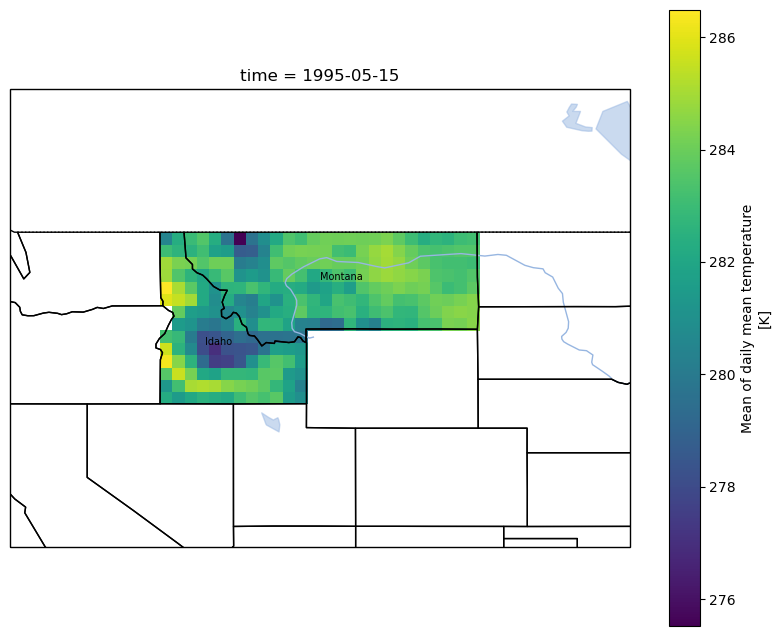

In [9]:
# Plotting a random time step jus to see the data on a map
alfala_states = ['Montana', 'Idaho']
fig = plt.figure(figsize=(10, 8))
# plotting on a map using cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES)

# plotting using xarray plot method
# Montana and Idaho For Alfala Barley
MT_coord = salem.read_shapefile(path+'cb_2018_us_state_500k.shp')
MT_coord = MT_coord[(MT_coord.NAME.isin(alfala_states))]
mnt_sub = clim.salem.subset(shape=MT_coord, margin=10)
MT_coord.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7),axis=1);
# Let's plot the daily average tempreture on a random time
randm_day = mnt_sub['TG'].isel( time=np.random.randint(len(mnt_sub.time)))
randm_day.salem.roi(shape=MT_coord).plot(ax=ax)
#Montana_anm = clim_loc['TG'].isel( time=np.random.randint(len(clim_loc.time))) - clim_loc['TG'].mean(dim='time')
#Montana_anm.plot(ax=ax)
plt.show()
plt.close()

In [16]:
mnt_sub.DTR

&lt;xarray.DataArray &#39;DTR&#39; (time: 1080, lat: 34, lon: 46)&gt;
dask.array&lt;getitem, shape=(1080, 34, 46), dtype=float32, chunksize=(50, 34, 46), chunktype=numpy.ndarray&gt;
Coordinates:
  * time     (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat      (lat) float64 37.25 37.75 38.25 38.75 ... 52.25 52.75 53.25 53.75
  * lon      (lon) float64 -121.8 -121.2 -120.8 -120.2 ... -100.2 -99.75 -99.25
Attributes:
    units:         
    long_name:     Mean of diurnal temperature range
    cell_methods:  time: mean

## Preparing Crop Production Data
Data link: https://quickstats.nass.usda.gov/results/347988B6-8746-305D-9147-D1A31FE09FD2

In [6]:
#  Now Reading All the Crop Data that we are interested in to data
path = "C:\\Users\\kurt_\\Dropbox\\code\\dell-github\\SpringBoard\\Capstone2\\Data\\"
files = [path+"Alfala.csv", path+"Corn.csv", path+"Soybean.csv"]
df = (pd.read_csv(f) for f in files)
df_crop = pd.concat(df, ignore_index=True)
print(df_crop.info())
df_crop.head(3)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           8522 non-null   object 
 1   Year              8522 non-null   int64  
 2   Period            8522 non-null   object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         8522 non-null   object 
 5   State             8522 non-null   object 
 6   State ANSI        8522 non-null   int64  
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    8522 non-null   int64  
 14  Watershed         0 non-null      float64
 15  Commodity         8522 non-null   object 
 16  Data Item         8522 non-n

Program  Year Period  Week Ending Geo Level    State  State ANSI  \
0  SURVEY  2019   YEAR          NaN     STATE    IDAHO          16   
1  SURVEY  2019   YEAR          NaN     STATE    IDAHO          16   
2  SURVEY  2019   YEAR          NaN     STATE  MONTANA          30   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN        HAY   
1               0        NaN        HAY   
2               0        NaN        HAY   

                                       Data Item Domain Domain Category  \
0    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   NOT SPECIFIED   
1  HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
2    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   NOT SPECIFIED   

       Value CV (%)  
0  4,444,000    NaN  
1        4.4    NaN  
2  4,515,000    NaN  

[3 rows x 21 columns]

In [7]:
# Missing Values
nan=pd.DataFrame(df_crop.isnull().sum().sort_values(ascending=False), columns = ['NULL values'])
nan

NULL values
County ANSI              8522
Region                   8522
Week Ending              8522
Ag District              8522
Ag District Code         8522
County                   8522
Watershed                8522
Zip Code                 8522
CV (%)                   7561
watershed_code              0
Value                       0
Commodity                   0
Data Item                   0
Domain                      0
State ANSI                  0
State                       0
Geo Level                   0
Domain Category             0
Period                      0
Year                        0
Program                     0

### Cleaning Data
Handling the missing values and getting rid of unrelavant columns:

* First ** Value column is object type. We need to convert it to Float. **
* Column CV (%) has many missing values. Let's drop that column.
* Also Let's drop all other nan values. None of the columns we are interested in has any nan values.


In [8]:
f = lambda x: x.replace(',', '')
df_crop['Value'] = df_crop['Value'].apply(f)
# Before converting to numeric let's see if there is non-numeric values and what they are
def IsNumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
S = lambda s: isinstance(s, (int, float))
_isdigit = df_crop['Value'].apply(IsNumeric)
_r = df_crop[~_isdigit]['Value'].value_counts()
print(f'There are {_r[0]} entries with the value of "{_r.index[0]}"' )

There are 156 entries with the value of &quot; (D)&quot;


According to the [Quick Stats Glossary](https://quickstats.nass.usda.gov/src/glossary.pdf) published by USDA for this dataset "D" corresponds to: 

> Withheld to avoid disclosing data for individual operations.

Thus all we can do is dropping these rows.


In [9]:
df_crop['Value'] = pd.to_numeric(df_crop['Value'], errors='coerce')
df_crop['Value'].isnull().sum()

156

Now Let's drop all nan values together.

In [10]:
#first get rid of the nan values in Value column only
df_crop.dropna(subset=['Value'], inplace=True)
# Now we can drop all the columns with nan values at once
df_crop.dropna(axis=1, inplace=True)
print(df_crop.info())
df_crop.head(3)


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 8366 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Program          8366 non-null   object 
 1   Year             8366 non-null   int64  
 2   Period           8366 non-null   object 
 3   Geo Level        8366 non-null   object 
 4   State            8366 non-null   object 
 5   State ANSI       8366 non-null   int64  
 6   watershed_code   8366 non-null   int64  
 7   Commodity        8366 non-null   object 
 8   Data Item        8366 non-null   object 
 9   Domain           8366 non-null   object 
 10  Domain Category  8366 non-null   object 
 11  Value            8366 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 849.7+ KB
None


Program  Year Period Geo Level    State  State ANSI  watershed_code  \
0  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
1  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
2  SURVEY  2019   YEAR     STATE  MONTANA          30               0   

  Commodity                                      Data Item Domain  \
0       HAY    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   
1       HAY  HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE  TOTAL   
2       HAY    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   

  Domain Category      Value  
0   NOT SPECIFIED  4444000.0  
1   NOT SPECIFIED        4.4  
2   NOT SPECIFIED  4515000.0

** There are some constant values and some entries we are not interested in. Let's remove them from the df_crop **

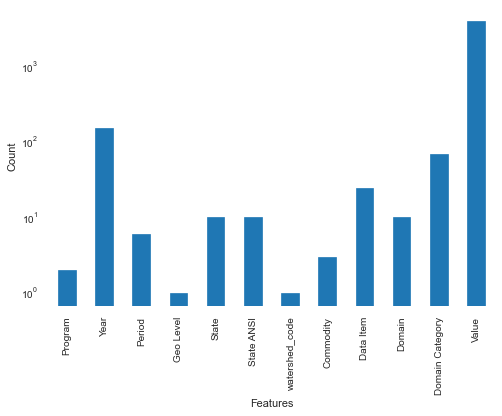

In [11]:
# First let's take a look at the number of unique 
# values in each column in a bar plot except the values column
df_crop.nunique().plot(kind='bar', logy=True)
plt.xlabel('Features')
plt.ylabel('Count')
plt.style.use('ggplot')
plt.show()
plt.close()
# Find those columns with constant values

** We need only Year entries for Period. Let's see what else is in there  **

Now dropping all rows with forecast entries given in Period

In [12]:
xf = df_crop['Period'] == 'YEAR'
df_crop = df_crop[xf]
df_crop.nunique()

Program               2
Year                155
Period                1
Geo Level             1
State                10
State ANSI           10
watershed_code        1
Commodity             3
Data Item            25
Domain               10
Domain Category      69
Value              3937
dtype: int64

** Let's take a look at Domain Catogories. **
* For this study some of the domains are irrelavant, like "ECONOMIC CLASS"
* Domain Catogories should be consistent among all "Data Item"s

In [13]:
print(df_crop['Domain Category'].value_counts(),'\n\n')
y = (df_crop['Domain Category'] == 'NOT SPECIFIED') & (df_crop['Program'] == 'SURVEY')
df_crop[~(y)].Commodity.value_counts()

NOT SPECIFIED                            4993
AREA HARVESTED: (250 TO 499 ACRES)         40
AREA HARVESTED: (500 TO 999 ACRES)         40
AREA HARVESTED: (100 TO 249 ACRES)         39
AREA HARVESTED: (1,000 OR MORE ACRES)      39
                                         ... 
NAICS CLASSIFICATION: (1124)                7
ECONOMIC CLASS: (1,000 TO 2,499 $)          7
NAICS CLASSIFICATION: (1113)                6
WATER SOURCE: (OFF FARM)                    6
NAICS CLASSIFICATION: (11191)               1
Name: Domain Category, Length: 69, dtype: int64 




SOYBEANS    1183
Name: Commodity, dtype: int64

There are 69 Domain Categories, but only Soybeans from CENSUS have Categories other than "NOT SPECIFIED".
** Hence, for now I seperate all those Domain Categories to deal with them later since they require special handling. **

Note that these entries are for CENCUS records. Thus it is already more reasonable to not mix data from two different source ("Survey and Cencus")

In [14]:
df_crop = df_crop[y]
df_crop2 = df_crop[~y]
df_crop.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 4929 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Program          4929 non-null   object 
 1   Year             4929 non-null   int64  
 2   Period           4929 non-null   object 
 3   Geo Level        4929 non-null   object 
 4   State            4929 non-null   object 
 5   State ANSI       4929 non-null   int64  
 6   watershed_code   4929 non-null   int64  
 7   Commodity        4929 non-null   object 
 8   Data Item        4929 non-null   object 
 9   Domain           4929 non-null   object 
 10  Domain Category  4929 non-null   object 
 11  Value            4929 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 500.6+ KB


We are only interested some of these columns. Let's drop the ones we will not use.

** We do not need constant value columns **

In [15]:
# Getting rid of features with constant values
nunq = df_crop.nunique()
for clm in df_crop:
    if nunq.loc[clm] == 1:
        df_crop.drop(clm, axis=1, inplace=True)
print(df_crop.nunique(),'\n\n')
df_crop.reset_index(drop=True, inplace=True)
df_crop.info()

Year           155
State           10
State ANSI      10
Commodity        3
Data Item       18
Value         2911
dtype: int64 


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        4929 non-null   int64  
 1   State       4929 non-null   object 
 2   State ANSI  4929 non-null   int64  
 3   Commodity   4929 non-null   object 
 4   Data Item   4929 non-null   object 
 5   Value       4929 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 231.2+ KB


In [17]:
df_crop.sample(5)

Year     State  State ANSI Commodity  \
3747  1895      IOWA          19      CORN   
688   1985   WYOMING          56       HAY   
3674  1900  NEBRASKA          31      CORN   
1042  1967   MONTANA          30       HAY   
4783  1946   INDIANA          18  SOYBEANS   

                                              Data Item        Value  
3747         CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         39.0  
688           HAY, ALFALFA, IRRIGATED - ACRES HARVESTED     361000.0  
3674           CORN, GRAIN - PRODUCTION, MEASURED IN BU  191100000.0  
1042  HAY, ALFALFA, NON-IRRIGATED - PRODUCTION, MEAS...     720000.0  
4783                         SOYBEANS - ACRES HARVESTED    1374000.0

In [150]:
# # Let's get rid of the rows where Period is smth other than Year
# period_to_rid = set(hay['Period']).difference(['YEAR'])
# print(f'The following period entries will be removed:\n {period_to_rid}')
# Period_rows = hay['Period'].isin(period_to_rid)
# hay = hay[~Period_rows]
# hay['Period'].value_counts()

## Pre-Processing & Exploring the Data
Now that we have crop data ready for analysis, we should now prepare the climate data. 
* Climate variables should be averaged for each state
* Then we need to aggregate all climate features thorugh each year.
    * Some features require averging, such as mean temperature, some require to be summed such as 'Biologically Effective Degree Days'
    * Note that each feature in climate data can have completely different effect depending on the season or month. For example while frost days can have a devastating effect on April it might have no effect at all on January. Therefore for some climate variables I should treat each month as a separate feature. 
    

## Getting State Climate Data


In [51]:
df_crop['Data Item'].value_counts()

SOYBEANS - ACRES HARVESTED                                           977
CORN, GRAIN - ACRES HARVESTED                                        775
CORN, GRAIN - YIELD, MEASURED IN BU / ACRE                           775
CORN, GRAIN - PRODUCTION, MEASURED IN BU                             775
SOYBEANS, IRRIGATED - ACRES HARVESTED                                478
HAY, ALFALFA - PRODUCTION, MEASURED IN TONS                          404
HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE                        404
SOYBEANS - YIELD, MEASURED IN BU / ACRE                              370
HAY, ALFALFA, IRRIGATED - PRODUCTION, MEASURED IN TONS               116
HAY, ALFALFA, IRRIGATED - ACRES HARVESTED                            116
HAY, ALFALFA, IRRIGATED - YIELD, MEASURED IN TONS / ACRE             116
HAY, ALFALFA, NON-IRRIGATED - ACRES HARVESTED                        116
HAY, ALFALFA, NON-IRRIGATED - PRODUCTION, MEASURED IN TONS           116
HAY, ALFALFA, NON-IRRIGATED - YIELD, MEASURED IN TO

## Alfala Hay

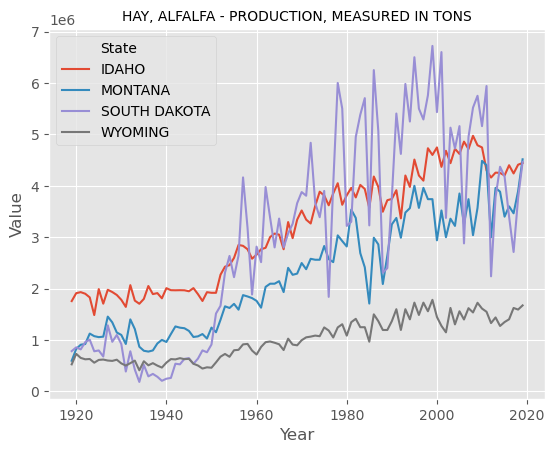

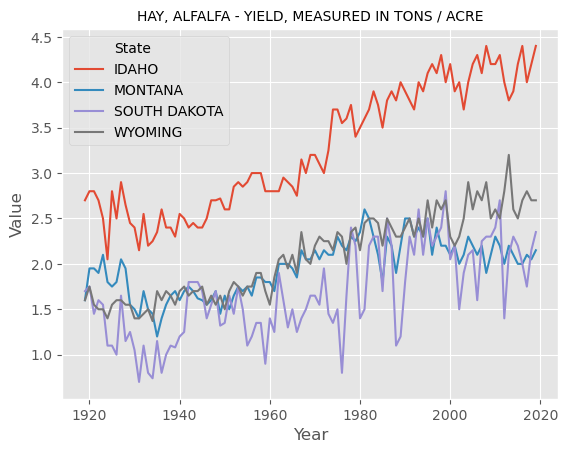

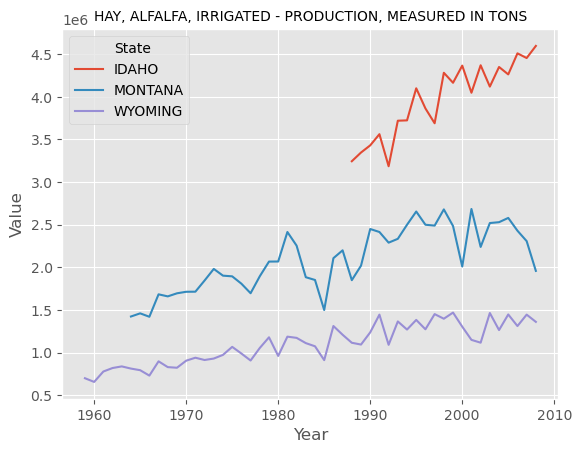

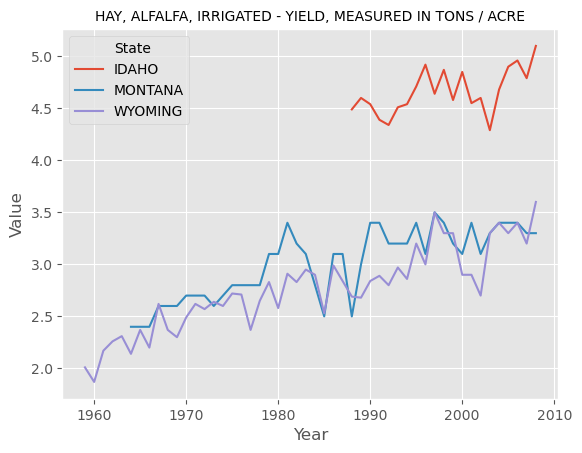

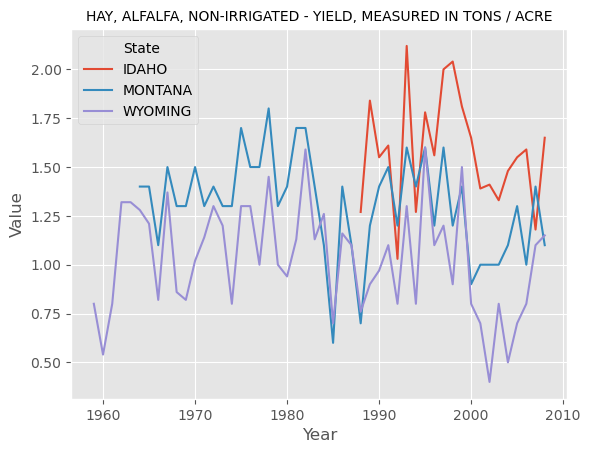

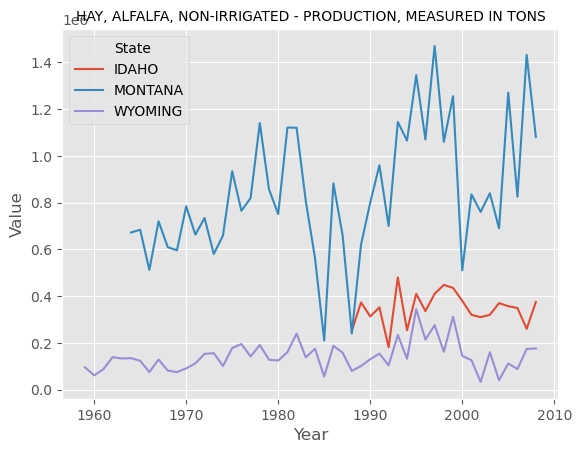

In [68]:
plotting = ["HAY, ALFALFA - PRODUCTION, MEASURED IN TONS",
            "HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE",
            "HAY, ALFALFA, IRRIGATED - PRODUCTION, MEASURED IN TONS",
            "HAY, ALFALFA, IRRIGATED - YIELD, MEASURED IN TONS / ACRE",
            "HAY, ALFALFA, NON-IRRIGATED - YIELD, MEASURED IN TONS / ACRE",
            "HAY, ALFALFA, NON-IRRIGATED - PRODUCTION, MEASURED IN TONS"]
for dt in plotting:
    alf_prd = df_crop[df_crop['Data Item'] == dt]
    sns.lineplot(data = alf_prd, x='Year', y='Value', hue='State')
    plt.title(dt, fontsize=10)
    plt.show()
    plt.close()


## Dealing with Trends for Alfala
* There is a clear trend in Alfala production and yield except for Non-Irrigated Alfala
* Significant trend in Alfala is perhaps related to development in agricultral technologies
* Warming climate may also have a positive impact. Irrigated crops might benefit from warmer temperature due to increased photosynthesis. (** REF. **)
* Non-Irrigated crops may or may not tolarate warmer climate depending on soil water availability. This would explain the difference between Irrigated and Non-irrigated Alfala yield trends. 
* The priority of this project is to investigate how crop yield is affected by weather conditions. Therefore interannual variability in yield is more important than decadal variability where the latter is related not only Climate but also development in agricultural technologies and human beheviours.

* Therofore, I will first ** detrend the predictor (climate) variables and response (yield). **  

In [38]:
df_crop['Data Item'].value_counts

SOYBEANS - ACRES HARVESTED                                           977
CORN, GRAIN - ACRES HARVESTED                                        775
CORN, GRAIN - YIELD, MEASURED IN BU / ACRE                           775
CORN, GRAIN - PRODUCTION, MEASURED IN BU                             775
SOYBEANS, IRRIGATED - ACRES HARVESTED                                478
HAY, ALFALFA - PRODUCTION, MEASURED IN TONS                          404
HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE                        404
SOYBEANS - YIELD, MEASURED IN BU / ACRE                              370
HAY, ALFALFA, IRRIGATED - PRODUCTION, MEASURED IN TONS               116
HAY, ALFALFA, IRRIGATED - ACRES HARVESTED                            116
HAY, ALFALFA, IRRIGATED - YIELD, MEASURED IN TONS / ACRE             116
HAY, ALFALFA, NON-IRRIGATED - ACRES HARVESTED                        116
HAY, ALFALFA, NON-IRRIGATED - PRODUCTION, MEASURED IN TONS           116
HAY, ALFALFA, NON-IRRIGATED - YIELD, MEASURED IN TO

In [37]:
a= "SOYBEANS, IRRIGATED - ACRES HARVESTED"
ah = "ACRES HARVESTED"
S = lambda s: ah in s
test = df_crop['Data Item'].apply(S)
df_crop[test]

Program  Year Period Geo Level     State  State ANSI  watershed_code  \
234   SURVEY  2008   YEAR     STATE     IDAHO          16               0   
237   SURVEY  2008   YEAR     STATE     IDAHO          16               0   
242   SURVEY  2008   YEAR     STATE   MONTANA          30               0   
245   SURVEY  2008   YEAR     STATE   MONTANA          30               0   
252   SURVEY  2008   YEAR     STATE   WYOMING          56               0   
...      ...   ...    ...       ...       ...         ...             ...   
8512  SURVEY  1925   YEAR     STATE   INDIANA          18               0   
8514  SURVEY  1925   YEAR     STATE      IOWA          19               0   
8516  SURVEY  1924   YEAR     STATE  ILLINOIS          17               0   
8518  SURVEY  1924   YEAR     STATE   INDIANA          18               0   
8520  SURVEY  1924   YEAR     STATE      IOWA          19               0   

     Commodity                                      Data Item Domain  \
234        HAY      HAY, ALFALFA, IRRIGATED - ACRES HARVESTED  TOTAL   
237        HAY  HAY, ALFALFA, NON-IRRIGATED - ACRES HARVESTED  TOTAL   
242        HAY      HAY, ALFALFA, IRRIGATED - ACRES HARVESTED  TOTAL   
245        HAY  HAY, ALFALFA, NON-IRRIGATED - ACRES HARVESTED  TOTAL   
252        HAY      HAY, ALFALFA, IRRIGATED - ACRES HARVESTED  TOTAL   
...        ...                                            ...    ...   
8512  SOYBEANS                     SOYBEANS - ACRES HARVESTED  TOTAL   
8514  SOYBEANS                     SOYBEANS - ACRES HARVESTED  TOTAL   
8516  SOYBEANS                     SOYBEANS - ACRES HARVESTED  TOTAL   
8518  SOYBEANS                     SOYBEANS - ACRES HARVESTED  TOTAL   
8520  SOYBEANS                     SOYBEANS - ACRES HARVESTED  TOTAL   

     Domain Category      Value  
234    NOT SPECIFIED   900000.0  
237    NOT SPECIFIED   230000.0  
242    NOT SPECIFIED   595000.0  
245    NOT SPECIFIED  1005000.0  
252    NOT SPECIFIED   380000.0  
...              ...        ...  
8512   NOT SPECIFIED    40000.0  
8514   NOT SPECIFIED     7000.0  
8516   NOT SPECIFIED   115000.0  
8518   NOT SPECIFIED    66000.0  
8520   NOT SPECIFIED    10000.0  

[2635 rows x 12 columns]

In [167]:
df_crop[df_crop['Program'] == 'CENSUS']
df_crop[df_crop['Program'] == 'CENSUS']['Data Item'].value_counts()

SOYBEANS, IRRIGATED - ACRES HARVESTED                                28
SOYBEANS - ACRES HARVESTED                                           20
SOYBEANS, IRRIGATED - WATER APPLIED, MEASURED IN ACRE FEET / ACRE     8
SOYBEANS, IRRIGATED - YIELD, MEASURED IN BU / ACRE                    8
Name: Data Item, dtype: int64

In [148]:
df_crop.profile_report(explorative=True, html={'style': {'full_width': True}})


Render HTML: 100%|██████████| 1/1 [00:00&lt;00:00,  1.07it/s]


&lt;IPython.core.display.HTML object&gt;

In [ ]:
#Turkey
#clim_loc = clim.where((clim.lat > 30) & (clim.lat < 50) & (clim.lon >20 ) & (clim.lon < 45), drop=True)
#shdf = salem.read_shapefile(salem.get_demo_file('world_borders.shp'))
#shdf = shdf.loc[shdf['CNTRY_NAME'] == 'Turkey']

feature_cols = [ 'Rainfall' ,'Temperature','Usage amount']
target_v = df['water level']
X = df[feature_cols] 
y = target_v 

from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

mean = np.mean((df.values), axis=-1, keepdims=True)
detrended = df - mean